In [150]:
import numpy as np 
import pandas as pd
import os, time, glob 

import matplotlib.pyplot as plt 
import seaborn as sns 

In [151]:
pd.set_option('display.max_rows', 500)

In [240]:
data_dir = ('/Users/67981492/Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/aggregated_data/')
data_fn = ('obs_padded_df.csv')

supp_fig_path = ('/Users/67981492/Dropbox/loki_0_0.5/pcb_submission_figures/supp_figures/')

In [220]:
padded_df = pd.read_csv(os.path.join(data_dir, data_fn))

vol_df = padded_df.loc[padded_df.experiment == 'volatility'].copy()

In [154]:
padded_df.head()

,abs_epoch_trial,epoch_trial,condition,ID,experiment,gen_lambda,gen_p_opt,epoch_n
0,0,0.0,lv,776,volatility,35.0,0.75,1.0
1,1,1.0,lv,776,volatility,35.0,0.75,1.0
2,2,2.0,lv,776,volatility,35.0,0.75,1.0
3,3,3.0,lv,776,volatility,35.0,0.75,1.0
4,4,4.0,lv,776,volatility,35.0,0.75,1.0


In [156]:
random_ID = padded_df.ID.sample().values[0]

In [161]:
sample_data = padded_df.loc[(padded_df.ID == random_ID)].reset_index(drop=True)

In [162]:
sample_data.head()

,abs_epoch_trial,epoch_trial,condition,ID,experiment,gen_lambda,gen_p_opt,epoch_n
0,0,0.0,lv,781,volatility,35.0,0.75,1.0
1,1,1.0,lv,781,volatility,35.0,0.75,1.0
2,2,2.0,lv,781,volatility,35.0,0.75,1.0
3,3,3.0,lv,781,volatility,35.0,0.75,1.0
4,4,4.0,lv,781,volatility,35.0,0.75,1.0


In [192]:
# test case 

# way to capitalize on all the hv data epochs? 
# currently truncating at max epoch_n for lv

hv_data = sample_data.loc[sample_data.condition == 'hv'].reset_index(drop=True)
lv_data = sample_data.loc[sample_data.condition == 'lv'].reset_index(drop=True)

assert lv_data.epoch_n.max() < hv_data.epoch_n.max(), 'check hv / lv data'

hv_truncated = hv_data.loc[hv_data.epoch_n <= lv_data.epoch_n.max()].reset_index(drop=True)

assert len(hv_truncated) == len(lv_data), 'check len'

overlap = lv_data.epoch_trial == hv_truncated.epoch_trial

In [198]:
sparse_df = pd.DataFrame({'overlap': overlap, 'epoch_trial': hv_truncated.abs_epoch_trial})

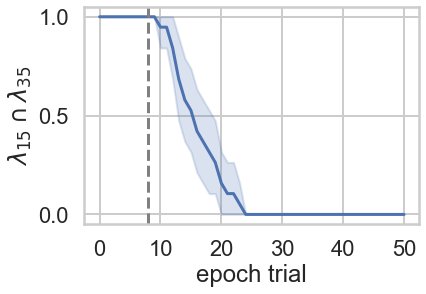

In [219]:
sns.set(font_scale=1.5, style='whitegrid'); sns.despine(); sns.set_context('poster')

sns.lineplot('epoch_trial', 'overlap', data=sparse_df,)
plt.xlabel('epoch trial')
plt.ylabel(r'$\lambda_{15}\cap\lambda_{35}$')
plt.xticks(np.arange(0, sparse_df.epoch_trial.max()+10, 10), np.arange(0, sparse_df.epoch_trial.max()+10, 10))
plt.axvline(x=8, linestyle='--', color='gray')

In [230]:
# way to capitalize on all the hv data epochs? 
# currently truncating at max epoch_n for lv

sparse_dfs = []

for ID in vol_df.ID.unique():
    
    sub_data = vol_df.loc[vol_df.ID == ID].copy()
    
    hv_data = sub_data.loc[sub_data.condition == 'hv'].reset_index(drop=True)
    lv_data = sub_data.loc[sub_data.condition == 'lv'].reset_index(drop=True)

    assert lv_data.epoch_n.max() < hv_data.epoch_n.max(), 'check hv / lv data'

    hv_truncated = hv_data.loc[hv_data.epoch_n <= lv_data.epoch_n.max()].reset_index(drop=True)

    assert len(hv_truncated) == len(lv_data), 'check len'

    overlap = lv_data.epoch_trial == hv_truncated.epoch_trial
    
    sparse_df = pd.DataFrame({'overlap': overlap, 'epoch_trial': hv_truncated.abs_epoch_trial,
                             })
    sparse_df['ID'] = sub_data.ID.unique()[0]
    sparse_df['epoch_n'] = sub_data.epoch_n.unique()[0]


    
    sparse_dfs.append(sparse_df)

In [235]:
overlap_df = pd.concat(sparse_dfs)

In [236]:
overlap_df.head()

,overlap,epoch_trial,ID,epoch_n
0,True,0,776,1.0
1,True,1,776,1.0
2,True,2,776,1.0
3,True,3,776,1.0
4,True,4,776,1.0


<Figure size 432x288 with 0 Axes>

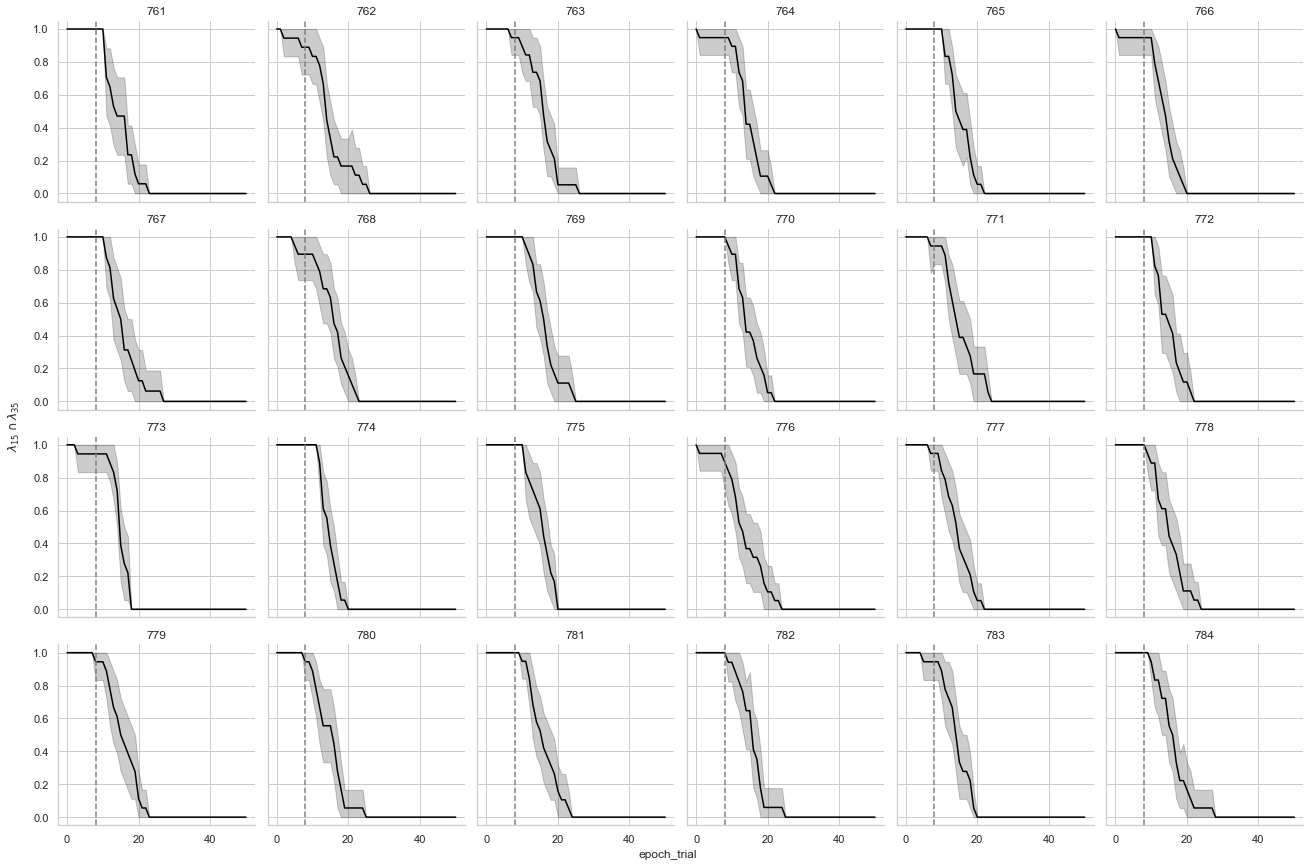

In [291]:
sns.set(font_scale=1.5, style='whitegrid');  sns.despine();


g = sns.FacetGrid(data=overlap_df, col='ID', col_wrap=6)
g.map(sns.lineplot, 'epoch_trial', 'overlap', color='black')


g.set_axis_labels('', '') 

# super ylabel
g.fig.text(x=-0.01, y=0.5, 
           verticalalignment='center',
           s=(r'$\lambda_{15}\cap\lambda_{35}$'),
         
           rotation=90) 


# super xlabel
g.fig.text(x=0.5, y=0, 
           horizontalalignment='center', 
           s='epoch_trial',
         )
g.map(plt.axvline, x=8, ls="--", c="gray")

g.set_titles("{col_name}")  # use this argument literally
plt.tight_layout()

plt.savefig(os.path.join(supp_fig_path, 'loki0_init_window_selection_all_subs.png'))

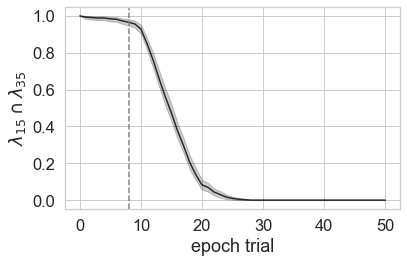

In [286]:
sns.set(font_scale=1, style='whitegrid');  sns.despine();


sns.lineplot("epoch_trial", "overlap", data=overlap_df, color='black', alpha=0.8)
plt.xlabel('epoch trial')
plt.ylabel(r'$\lambda_{15}\cap\lambda_{35}$')
plt.xticks(np.arange(0, sparse_df.epoch_trial.max()+10, 10), np.arange(0, sparse_df.epoch_trial.max()+10, 10))
plt.axvline(x=8, linestyle='--', color='gray')

plt.tight_layout()
plt.savefig(os.path.join(supp_fig_path, 'loki0_init_window_selection_mean_ci.png'), dpi=300)

<Figure size 432x288 with 0 Axes>

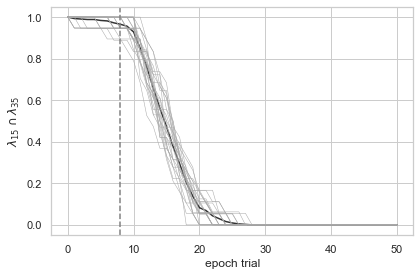

In [287]:
sns.set(font_scale=1, style='whitegrid'); sns.despine();

plt.figure()

sns.lineplot("epoch_trial", "overlap", data=overlap_df, ci=None, color='black', alpha=0.8)

for ID in overlap_df.ID.unique():
    sub_data = overlap_df.loc[overlap_df.ID == ID].copy()
    sns.lineplot("epoch_trial", "overlap", data=sub_data, color='darkgray', ci=None, linewidth=0.5)
    
plt.xlabel('epoch trial')
plt.ylabel(r'$\lambda_{15}\cap\lambda_{35}$')
plt.xticks(np.arange(0, sparse_df.epoch_trial.max()+10, 10), np.arange(0, sparse_df.epoch_trial.max()+10, 10))
plt.axvline(x=8, linestyle='--', color='gray')

plt.tight_layout()
plt.savefig(os.path.join(supp_fig_path, 'loki0_init_window_selection_subs.pdf'), dpi=300)